# IEMS 351 Lab 3 Fall 2024

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Unconstrained Minimization Problem 
$$
\min_{x \in \mathbb{R}^n} f(x)
$$

## Update rule with constant step size in the gradient method 

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

## Example 1
$$
\min_{x \in \mathbb{R}^2} \ f(x_1, x_2) = x_1^2 + x_2^2
$$
Gradient of $f$ is 
$$
\nabla f(x) = \begin{bmatrix}
2 x_1 \\
2 x_2
\end{bmatrix}
$$
Hessian of $f$ is 
$$
\nabla^2 f(x) = \begin{bmatrix}
2 & 0\\
0 & 2
\end{bmatrix}
$$


In [2]:
# define parameters in the gradient method
def func1(x):
    return x[0] * x[0] + x[1] * x[1]


def grad_func1(x):
    return np.array([2 * x[0], 2 * x[1]])


# stepsize
alpha = 0.2
# initial point
x0 = np.array([4, -4])

## Generate a contour plot of example 1

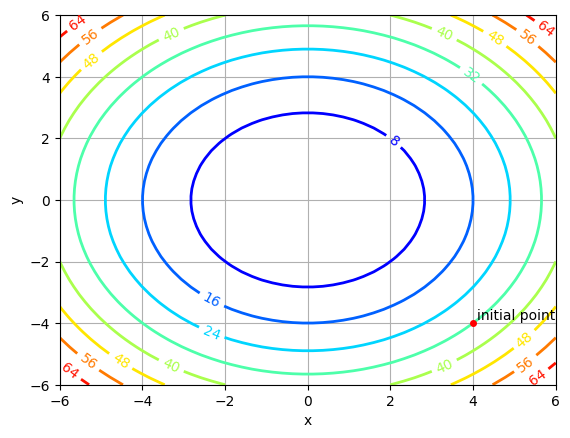

In [4]:
# plot the contour
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)

X, Y = np.meshgrid(x, y)
Z = X * X + Y * Y
CS = plt.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
plt.clabel(CS, inline=1, fontsize=10)
# plot the initial point
plt.plot(x0[0], x0[1], "or", markersize=4)
plt.text(x0[0] + 0.1, x0[1] + 0.1, "initial point")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Plot the trajectory of gradient method in the first iteration 

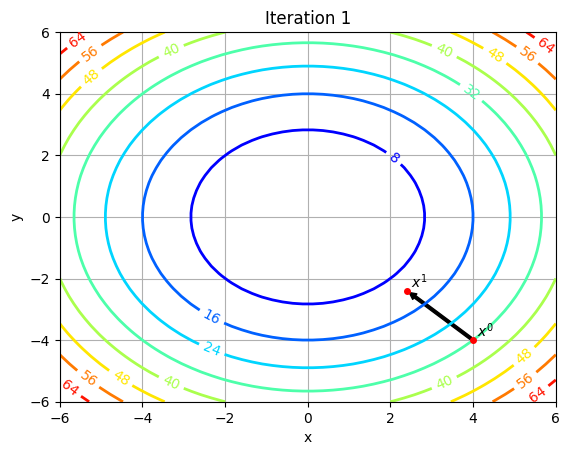

In [6]:
# first iteration
grad_x0 = grad_func1(x0)
x1 = x0 - alpha * grad_x0
# plot arrow
arrow = FancyArrowPatch(
    (x0[0], x0[1]), (x1[0], x1[1]), arrowstyle="simple", color="k", mutation_scale=10
)
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)
ax.add_patch(arrow)
# plot the initial point
ax.plot(x0[0], x0[1], "or", markersize=4)
ax.plot(x1[0], x1[1], "or", markersize=4)
ax.text(x0[0] + 0.1, x0[1] + 0.1, r"$x^0$")
ax.text(x1[0] + 0.1, x1[1] + 0.1, r"$x^1$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Iteration 1")
plt.grid()
plt.show()

## Plot the trajectory of gradient method in the second iteration  

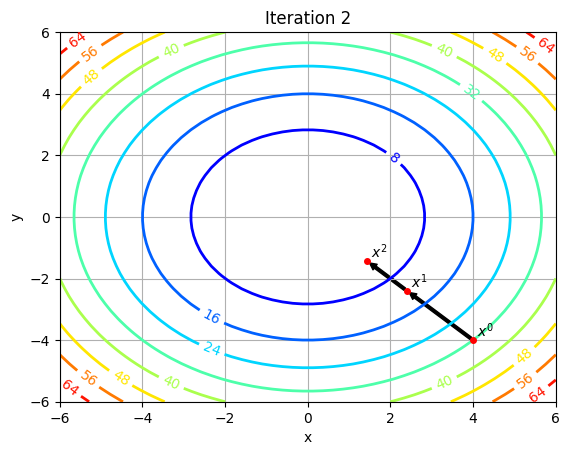

In [7]:
# second iteration
grad_x1 = grad_func1(x1)
x2 = x1 - alpha * grad_x1
# plot arrow
arrow1 = FancyArrowPatch(
    (x0[0], x0[1]), (x1[0], x1[1]), arrowstyle="simple", color="k", mutation_scale=10
)
arrow2 = FancyArrowPatch(
    (x1[0], x1[1]), (x2[0], x2[1]), arrowstyle="simple", color="k", mutation_scale=10
)
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
# plot the initial point
ax.plot(x0[0], x0[1], "or", markersize=4)
ax.plot(x1[0], x1[1], "or", markersize=4)
ax.plot(x2[0], x2[1], "or", markersize=4)
ax.text(x0[0] + 0.1, x0[1] + 0.1, r"$x^0$")
ax.text(x1[0] + 0.1, x1[1] + 0.1, r"$x^1$")
ax.text(x2[0] + 0.1, x2[1] + 0.1, r"$x^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Iteration 2")
plt.grid()
plt.show()

## Plot the entire trajectory of the gradient method 

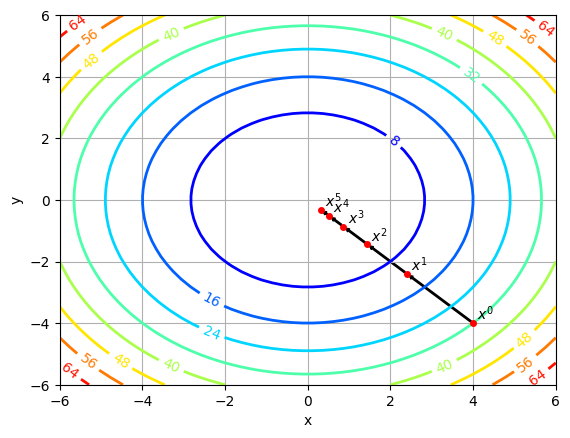

In [8]:
# Next, let us plot the progress of gradient method iteratively
fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)

# max number of iterations
max_iterations = 5
# initialize current x
cur_x = x0
ax.text(cur_x[0] + 0.1, cur_x[1] + 0.1, r"$x^0$")
ax.plot(cur_x[0], cur_x[1], "or", markersize=4)
for i in range(max_iterations):
    cur_grad = grad_func1(cur_x)
    next_x = cur_x - alpha * cur_grad
    arrow = FancyArrowPatch(
        (cur_x[0], cur_x[1]),
        (next_x[0], next_x[1]),
        arrowstyle="simple",
        color="k",
        mutation_scale=5,
    )
    ax.add_patch(arrow)
    ax.plot(next_x[0], next_x[1], "or", markersize=4)
    ax.text(next_x[0] + 0.1, next_x[1] + 0.1, r"$x^{}$".format(i + 1))
    # update
    cur_x = next_x
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()
plt.show()

## Example 2
$$
\min_{x \in \mathbb{R}^2} \ f(x_1,x_2) = x_1^2 \sin(x_2) + x_2 \cos(x_1) 
$$
The gradient of $f$ is 
$$
\nabla f(x) = \begin{bmatrix}
            2 x_1 \sin x_2 - x_2 \sin x_1 \\
            x_1^2 \cos x_2 + \cos x_1
        \end{bmatrix}
$$
The Hessian of $f$ is 
$$
\textbf{H} f(x) = \begin{bmatrix}
        2\sin x_2 - x_2 \cos x_1 & 2 x_1 \cos x_2 - \sin x_1 \\
        2 x_1 \cos x_2 - \sin x_1 & -x_1^2 \sin x_2
        \end{bmatrix}
$$

## TODO1: Plot the trajectory of the gradient method

In [36]:
# define parameters in the gradient method
def func2(x):
    return (x[0] ** 2 * np.sin(x[0])) + (x[1] * np.cos(x[1]))


def grad_func2(x):
    return np.array(
        [
            (2 * x[0] * np.sin(x[1])) - (x[1] * np.sin(x[0])),
            ((x[0] ** 2) * np.cos(x[1])) + (np.cos(x[0])),
        ]
    )


# stepsize
alpha = 0.2
# initial point
x0 = np.array([4, -4])

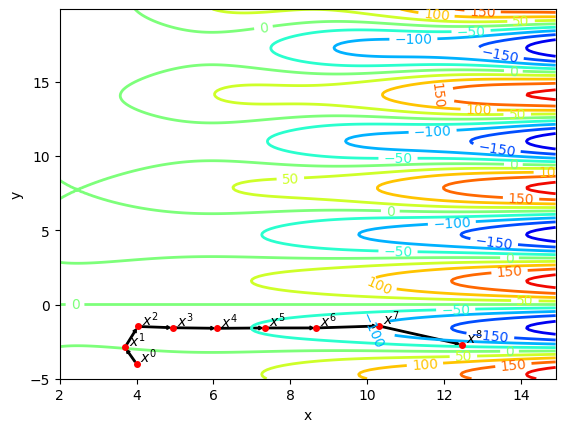

In [43]:
# Next, let us plot the progress of gradient method
x = np.arange(2, 15, 0.1)
y = np.arange(-5, 20, 0.1)

X, Y = np.meshgrid(x, y)
Z = X * X * np.sin(Y) + Y * np.cos(X)

fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)

# max number of iterations
max_iterations = 8
# reset the stepszie alpha
alpha = 0.1
# initialize current x
cur_x = x0
ax.text(cur_x[0] + 0.1, cur_x[1] + 0.1, r"$x^0$")
ax.plot(cur_x[0], cur_x[1], "or", markersize=4)
for i in range(max_iterations):
    cur_grad = grad_func2(cur_x)
    next_x = cur_x - alpha * cur_grad
    arrow = FancyArrowPatch(
        (cur_x[0], cur_x[1]),
        (next_x[0], next_x[1]),
        arrowstyle="simple",
        color="k",
        mutation_scale=5,
    )
    ax.add_patch(arrow)
    ax.plot(next_x[0], next_x[1], "or", markersize=4)
    ax.text(next_x[0] + 0.1, next_x[1] + 0.1, r"$x^{}$".format(i + 1))
    # update
    cur_x = next_x
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## TODO2: Make the stepszie $\alpha$ smaller and plot the trajectory of the gradient method 

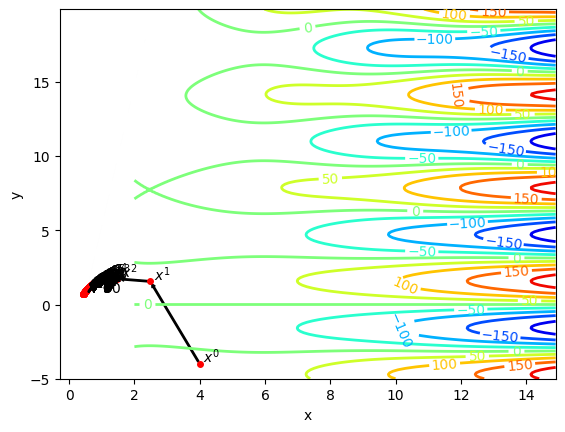

In [46]:
# Next, let us plot the progress of gradient method
x = np.arange(2, 15, 0.1)
y = np.arange(-5, 20, 0.1)

X, Y = np.meshgrid(x, y)
Z = X * X * np.sin(Y) + Y * np.cos(X)

fig, ax = plt.subplots(1, 1)
CS = ax.contour(X, Y, Z, 10, cmap="jet", linewidths=2)
ax.clabel(CS, inline=1, fontsize=10)

# max number of iterations
max_iterations = 100
# reset the stepszie alpha
alpha = 0.5
# initialize current x
cur_x = x0
ax.text(cur_x[0] + 0.1, cur_x[1] + 0.1, r"$x^0$")
ax.plot(cur_x[0], cur_x[1], "or", markersize=4)
for i in range(max_iterations):
    cur_grad = grad_func2(cur_x)
    next_x = cur_x - alpha * cur_grad/(1+i)
    arrow = FancyArrowPatch(
        (cur_x[0], cur_x[1]),
        (next_x[0], next_x[1]),
        arrowstyle="simple",
        color="k",
        mutation_scale=5,
    )
    ax.add_patch(arrow)
    ax.plot(next_x[0], next_x[1], "or", markersize=4)
    ax.text(next_x[0] + 0.1, next_x[1] + 0.1, r"$x^{}$".format(i + 1))
    # update
    cur_x = next_x
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## Question: Does the global minimier of $f(x_1,x_2) = x_1^2 \sin(x_2) + x_2 \cos(x_1)$ exist?
Hint: Set $x_2 = \frac{3\pi}{2}$ and let $x_1 \rightarrow \infty$, what do you obersve? 

$$
x_1^2 \sin(x_2) + x_2 \cos(x_1)
$$

$$
\Leftrightarrow \infty \sin(\frac{3\pi}{2}) + \frac{3\pi}{2} \cos(\infty)
$$

$$
\Leftrightarrow - \infty + \frac{3\pi}{2} \cos(\infty)
$$

The first part of the equation is unbounded, which means there isn't a way to figure out a globally min.